In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
df= pd.read_csv('C:/Users/hp/OneDrive/Desktop/archive (2)/Fitabase Data 4.12.16-5.12.16/just/202310-divvy-tripdata/202310-divvy-tripdata.csv')
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Convert the datatypes of the start times and the end times from object to datetime

In [4]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [5]:
df.shape

(537113, 13)

Explore the relationship between rideable_type and member_casual with Crosstab

In [6]:
CrosstabResult=pd.crosstab(index=df['rideable_type'],columns=df['member_casual'])
print(CrosstabResult)

member_casual  casual  member
rideable_type                
classic_bike    83166  185197
electric_bike   93905  174845


<Axes: xlabel='rideable_type'>

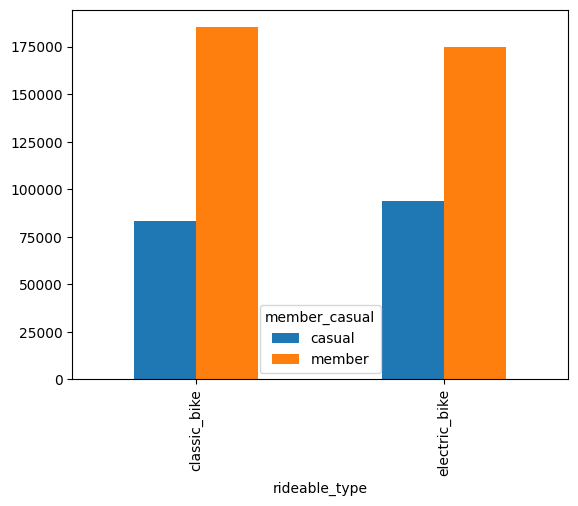

In [7]:
CrosstabResult.plot.bar()

Get the specific days of the week when the trips started.

In [8]:

df['Day']= df['started_at'].dt.isocalendar().day

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,7
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,3
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,4
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,2
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,1


In this case, 7 stands for Sunday while 1 stands for Monday, we can therefore interpret the remaining numbers.

So, I will further explore the relationship between the Days the trips were taken and which type of rider took them

In [10]:
Day_vs_rider =pd.crosstab(index=df['Day'],columns=df['member_casual'])
print(Day_vs_rider)

member_casual  casual  member
Day                          
1               24005   59180
2               26837   68543
3               23049   56046
4               19616   50279
5               20484   43338
6               25002   35709
7               38078   46947


<Axes: xlabel='Day'>

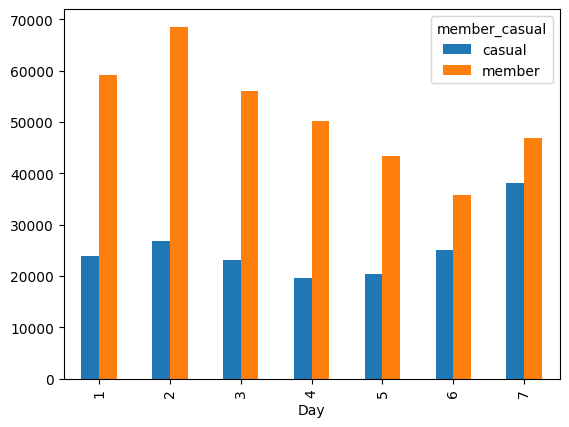

In [11]:
Day_vs_rider.plot.bar()

Majority of the  casual riders use the bike sharing service on Sunday, which is during the weekend, and comparing this to the members who use the bike sharing system mostly during weekdays, we can infer that one of the discrepancies is that the casual riders don't use the sharing service to commute to work, or if they do, they don't use it regularly. The company should put an ad in place targeted at their casual customers, highlighting how the members have benefited from biking to work regularly, and the role biking has to play in reducing fossil fuels emissions. Appeal to their sense of preservation of the environment, and tell them the less cars on the road during workdays, the better. Biking is also a way to exercise and improve overall health, let the digital ads empasize these points. Encourage them to get a membership, to enable them bike regularly to and from their places of work, and play their part in environmental preservation.

Get the duration of the trips as a differnence

In [12]:
df['time_difference']= df['ended_at']- df['started_at']

In [13]:
df.tail(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day,time_difference
537103,362C6E0FCE05C262,classic_bike,2023-10-03 07:34:29,2023-10-03 09:32:03,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,casual,2,0 days 01:57:34
537104,B79614366F0B86C8,electric_bike,2023-10-05 22:36:23,2023-10-05 22:43:05,Ashland Ave & Wellington Ave,13269,Leavitt St & Addison St,KA1504000143,41.936090,-87.669939,41.946655,-87.683359,casual,4,0 days 00:06:42
537105,FDF083F0E92F13E4,classic_bike,2023-10-28 09:27:51,2023-10-28 09:28:55,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,casual,6,0 days 00:01:04
537106,A934D4AAD867B08D,electric_bike,2023-10-28 10:52:36,2023-10-28 11:00:11,Fairbanks Ct & Grand Ave,TA1305000003,Fairbanks Ct & Grand Ave,TA1305000003,41.891915,-87.620558,41.891847,-87.620580,casual,6,0 days 00:07:35
537107,E264BF85F3DCCFDB,electric_bike,2023-10-11 17:10:52,2023-10-11 17:36:33,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883697,-87.641315,41.891847,-87.620580,casual,3,0 days 00:25:41
537108,CB82F1F5D0505469,classic_bike,2023-10-30 07:35:46,2023-10-30 07:49:30,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,41.891847,-87.620580,member,1,0 days 00:13:44
537109,E2C362589E4AD3A9,classic_bike,2023-10-10 06:29:55,2023-10-10 06:45:19,Clark St & Lincoln Ave,13179,Fairbanks Ct & Grand Ave,TA1305000003,41.915689,-87.634600,41.891847,-87.620580,member,2,0 days 00:15:24
537110,965D4156EDECF21A,classic_bike,2023-10-26 06:26:23,2023-10-26 06:39:43,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,41.891847,-87.620580,member,4,0 days 00:13:20
537111,0919ED32225E4D31,classic_bike,2023-10-09 08:47:29,2023-10-09 08:47:33,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,member,1,0 days 00:00:04
537112,34C4F779743D5F49,electric_bike,2023-10-13 17:30:30,2023-10-13 17:42:15,Clinton St & Washington Blvd,WL-012,Clark St & 9th St (AMLI),SL-009,41.883543,-87.641270,41.870816,-87.631246,member,5,0 days 00:11:45


In [14]:
df.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
Day                            UInt32
time_difference       timedelta64[ns]
dtype: object

Convert the duration into seconds, and add the column to the dataframe

In [15]:
df['durationSeconds'] = df['time_difference'].dt.total_seconds()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day,time_difference,durationSeconds
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,7,0 days 00:12:53,773.0
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,3,0 days 00:12:09,729.0
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,4,0 days 00:04:20,260.0
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,2,0 days 00:05:26,326.0
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,1,0 days 00:11:30,690.0


Explore the relationship between duration and member_casual

In [16]:
time_vs_rider =pd.crosstab(index=df['durationSeconds'],columns=df['member_casual'])
print(time_vs_rider)

member_casual    casual  member
durationSeconds                
-506.0                0       1
-352.0                1       0
-290.0                0       1
-229.0                1       0
-228.0                0       1
...                 ...     ...
 89993.0             35      13
 89994.0             58      17
 89995.0             71      20
 89996.0             41       9
 89997.0              5       0

[8938 rows x 2 columns]


I am getting negative values for the duration of certain bike trips, So, in order to see what's going on, I will view one of the row where the duration is negative. 

In [17]:
df[df['durationSeconds']==-506.0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day,time_difference,durationSeconds
177706,C7D66AEFAB9FF638,electric_bike,2023-10-04 07:16:26,2023-10-04 07:08:00,NaN,NaN,Franklin St & Monroe St,TA1309000007,41.88,-87.64,41.880317,-87.635185,member,3,-1 days +23:51:34,-506.0


On viewing this row, the column 'started_at' occurs at later time than 'ended_at' which is of course impossible, so, this must be an error. The other rows which have a negative value for duration will predictably be like this one viewed here, so the next line of action is to delete these rows from the dataframe

In [18]:
df= df[df['durationSeconds']>0.0] # Since the trip should be greater than O seconds for it to be considered a valid trip.

In [19]:
time_vs_rider =pd.crosstab(index=df['durationSeconds'],columns=df['member_casual'])
print(time_vs_rider)

member_casual    casual  member
durationSeconds                
1.0                  68     108
2.0                 123     367
3.0                  84     219
4.0                  59     142
5.0                  70     145
...                 ...     ...
89993.0              35      13
89994.0              58      17
89995.0              71      20
89996.0              41       9
89997.0               5       0

[8925 rows x 2 columns]


Still I have very short trips such as 1 second trips, and 2 second trips, which are not realistic, So, let me check what's going on here

In [20]:
df[df['durationSeconds']==2.0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day,time_difference,durationSeconds
2271,7CBB7C85D0B096E7,classic_bike,2023-10-17 19:47:44,2023-10-17 19:47:46,Desplaines St & Kinzie St,TA1306000003,Desplaines St & Kinzie St,TA1306000003,41.888716,-87.644448,41.888716,-87.644448,member,2,0 days 00:00:02,2.0
2278,4864FA090692F57F,classic_bike,2023-10-10 18:00:21,2023-10-10 18:00:23,Desplaines St & Kinzie St,TA1306000003,Desplaines St & Kinzie St,TA1306000003,41.888716,-87.644448,41.888716,-87.644448,member,2,0 days 00:00:02,2.0
2347,93CE48B0F434799D,electric_bike,2023-10-05 08:37:44,2023-10-05 08:37:46,Western Ave & Ardmore Ave,464,Western Ave & Ardmore Ave,464,41.986611,-87.689676,41.986764,-87.689880,casual,4,0 days 00:00:02,2.0
6834,E32F56F49FC68764,classic_bike,2023-10-09 15:43:46,2023-10-09 15:43:48,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member,1,0 days 00:00:02,2.0
7319,DCC49C4A97A27DDC,classic_bike,2023-10-30 14:07:31,2023-10-30 14:07:33,Clark St & Elm St,TA1307000039,Clark St & Elm St,TA1307000039,41.902973,-87.631280,41.902973,-87.631280,member,1,0 days 00:00:02,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536856,8CB69F73AC52A448,classic_bike,2023-10-24 14:46:07,2023-10-24 14:46:09,Fairbanks Ct & Grand Ave,TA1305000003,Fairbanks Ct & Grand Ave,TA1305000003,41.891847,-87.620580,41.891847,-87.620580,casual,2,0 days 00:00:02,2.0
536957,5EC260AAE00307A1,classic_bike,2023-10-23 15:29:52,2023-10-23 15:29:54,Clark St & Lincoln Ave,13179,Clark St & Lincoln Ave,13179,41.915689,-87.634600,41.915689,-87.634600,member,1,0 days 00:00:02,2.0
536974,3024D049424DB3BA,electric_bike,2023-10-11 10:11:04,2023-10-11 10:11:06,Clark St & Lincoln Ave,13179,Clark St & Lincoln Ave,13179,41.915747,-87.634589,41.915689,-87.634600,member,3,0 days 00:00:02,2.0
537037,299DFCE49AF07CF1,classic_bike,2023-10-25 18:23:45,2023-10-25 18:23:47,Clinton St & Washington Blvd,WL-012,Clinton St & Washington Blvd,WL-012,41.883380,-87.641170,41.883380,-87.641170,member,3,0 days 00:00:02,2.0


On inspecting this portion of the dataframe, I can see that the start station names and the end station names are the same, this explains why the duration of the trip is so small, the riders hardly moved from their start location. From the crosstab dataframe three cells above, I can see that this occurs a lot for both casual riders and members. So, here I'm going to use my discretion to further clean the data, I will delete all rows that have a duration time less than 11seconds.

In [21]:
df= df[df['durationSeconds']>10.0]

In [22]:
#Then, I can view the crosstab again
time_vs_rider =pd.crosstab(index=df['durationSeconds'],columns=df['member_casual'])
print(time_vs_rider)

member_casual    casual  member
durationSeconds                
11.0                102     173
12.0                 97     178
13.0                102     164
14.0                118     175
15.0                 99     166
...                 ...     ...
89993.0              35      13
89994.0              58      17
89995.0              71      20
89996.0              41       9
89997.0               5       0

[8915 rows x 2 columns]


Calculate the mean duration of all trips for each rider type

<Axes: xlabel='member_casual', ylabel='durationSeconds'>

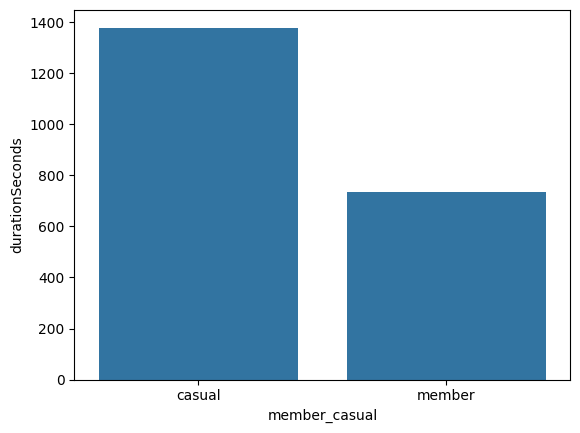

In [23]:
dfmvct=df.groupby('member_casual')['durationSeconds'].mean().reset_index()
sns.barplot(x='member_casual', y='durationSeconds', data=dfmvct)

So, on the average, the casual riders use the bikes for about 10 minutes more than the riders who are members. what could be the reason for this? The casual riders use the bikes for longer times probably in an effort of trying to maximize the amount of time they spend using the bikes because of expensive one-time payments compared to annual payments for members. The  company should make a targeted follow up advert to the casual riders, telling them how they can save money in the long run by becoming members.

Create a new dataframe that consists only of casual riders data

In [24]:
df_casual= df[df['member_casual']=='casual']
df_casual.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day,time_difference,durationSeconds
7,D9179D36E32D456C,classic_bike,2023-10-02 18:51:51,2023-10-02 18:57:09,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,casual,1,0 days 00:05:18,318.0
16,2E536F84DAC106A9,classic_bike,2023-10-22 14:12:30,2023-10-22 14:22:48,Larrabee St & North Ave,TA1306000008,Sheffield Ave & Webster Ave,TA1309000033,41.910210,-87.643500,41.921540,-87.653818,casual,7,0 days 00:10:18,618.0
17,E03FD93521EEA202,electric_bike,2023-10-13 03:01:38,2023-10-13 03:14:29,Western Ave & Winnebago Ave,13068,Public Rack - Kostner Ave & Armitage Ave,866,41.915599,-87.686934,41.917211,-87.736136,casual,5,0 days 00:12:51,771.0
18,DA0803D1C2EB4F62,electric_bike,2023-10-29 13:52:13,2023-10-29 14:00:51,Wolcott Ave & Polk St,TA1309000064,Morgan St & Polk St,TA1307000130,41.871380,-87.673579,41.871737,-87.651030,casual,7,0 days 00:08:38,518.0
19,517756C65FC62A95,classic_bike,2023-10-05 16:09:03,2023-10-05 16:26:42,Western Ave & Winnebago Ave,13068,Central Park Ave & Elbridge Ave,15644,41.915520,-87.687022,41.935337,-87.716889,casual,4,0 days 00:17:39,1059.0


In [25]:
df_casual['start_station_name'].value_counts()

start_station_name
Streeter Dr & Grand Ave                      3058
DuSable Lake Shore Dr & Monroe St            2371
Shedd Aquarium                               1699
Millennium Park                              1490
Michigan Ave & Oak St                        1396
                                             ... 
Public Rack - Pulaski Rd & Grenshaw St          1
Public Rack - Mozart Elementary School          1
Ewing Ave & Burnham Greenway                    1
Public Rack - Lockwood Ave & Diversey Ave       1
Public Rack - Laramie Ave & Warwick Ave         1
Name: count, Length: 1095, dtype: int64

In [26]:
df_casual['end_station_name'].value_counts()

end_station_name
Streeter Dr & Grand Ave                       3423
DuSable Lake Shore Dr & Monroe St             2100
Millennium Park                               1775
Shedd Aquarium                                1502
Michigan Ave & Oak St                         1448
                                              ... 
Public Rack - Mont Clare Ave & Higgins Ave       1
Hamlin Ave & Grand Ave                           1
Public Rack - Ewing Ave & 105th St               1
Public Rack - Kenneth Ave & 63rd St W            1
Kostner Ave & 63rd St                            1
Name: count, Length: 1069, dtype: int64

Create a new dataframe that consists only of members

In [27]:
df_member=df[df['member_casual']=='member']
df_member.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day,time_difference,durationSeconds
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,7,0 days 00:12:53,773.0
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,3,0 days 00:12:09,729.0
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,4,0 days 00:04:20,260.0
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,2,0 days 00:05:26,326.0
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,1,0 days 00:11:30,690.0


In [28]:
df_member['start_station_name'].value_counts()

start_station_name
University Ave & 57th St                  3065
Ellis Ave & 60th St                       2816
Clinton St & Washington Blvd              2643
Kingsbury St & Kinzie St                  2551
Clark St & Elm St                         2301
                                          ... 
Public Rack - Kedzie Ave & 58th St           1
Halsted St & 104th St                        1
Public Rack - Peterson Ave & Drake Ave       1
Public Rack - Nagel & Higgins                1
Western Ave & 111th St                       1
Name: count, Length: 1012, dtype: int64

In [29]:
df_member['end_station_name'].value_counts()

end_station_name
University Ave & 57th St                 3063
Clinton St & Washington Blvd             2832
Ellis Ave & 60th St                      2788
Kingsbury St & Kinzie St                 2538
Clinton St & Madison St                  2412
                                         ... 
Karlov Ave & Lawrence Ave                   1
Dauphin Ave & 103rd St                      1
Public Rack - Buffalo Ave & 89th St         1
Sacramento Ave & Pershing Rd                1
Public Rack - Maplewood Ave & 47th St       1
Name: count, Length: 1006, dtype: int64

The most common start and end station names for the casual riders and the members are distinct enough. Hence the name of the station most used by the casual riders should be taken note of, and  Lily Moreno, The director of marketing and the manager can direct marketing physical marketing campaigns towards this regions. It would entail a reiteration  on the benefits of biking, and why these set of users should bike more, and eventually subscribe for a  membership, to help them save costs in the long run.